In [7]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pygtftk as gtftk
import pyranges as pr

#Import your modules
#---------------------------------------
import te_rna_f as te

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'

%load_ext autoreload
sys.version

'3.9.12 (main, Apr  5 2022, 06:56:58) \n[GCC 7.5.0]'

# Load metadata




In [10]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')


In [11]:
male_GABA = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GABA')]
male_GLU = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GLU')]


In [12]:
zipped_pairs = zip(male_GLU['AGEYEARS'], male_GLU['Sample ID'])
z = [x for x in sorted(zipped_pairs)]
ind = z[::3][2:]
names = np.asarray(ind)[:,1]
ind, names

([(4, '6032'),
  (11, '6285'),
  (15, '1823'),
  (17, '5643'),
  (30, 'Hct16HECA028'),
  (35, '1277'),
  (39, '1241'),
  (58, '1848'),
  (62, '5326'),
  (77, '5744')],
 array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype='<U21'))

In [13]:
#GLU DATA
male_GLU_df = male_GLU.iloc[[np.where(names[i] == male_GLU['Sample ID'])[0][0] for i in range(len(names))]]
male_GLU_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
89,6032,GLU,6.5,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GLU,earlychildhood
91,6285,GLU,3.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GLU,latechildhood
16,1823,GLU,6.1,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GLU,adolescence
71,5643,GLU,5.5,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GLU,adolescence
109,Hct16HECA028,GLU,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GLU,adulthood
9,1277,GLU,5.9,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GLU,adulthood
93,1241,GLU,4.4,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GLU,adulthood
18,1848,GLU,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GLU,lateadulthood
55,5326,GLU,5.1,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GLU,lateadulthood
73,5744,GLU,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GLU,lateadulthood


In [7]:
#GABA DATA
male_GABA_df = male_GABA.iloc[[np.where(names[i] == male_GABA['Sample ID'])[0][0] for i in range(len(names))]]
male_GABA_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
88,6032,GABA,6.6,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GABA,earlychildhood
90,6285,GABA,4.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GABA,latechildhood
15,1823,GABA,5.8,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GABA,adolescence
70,5643,GABA,5.4,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GABA,adolescence
108,Hct16HECA028,GABA,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GABA,adulthood
8,1277,GABA,5.6,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GABA,adulthood
92,1241,GABA,4.8,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GABA,adulthood
17,1848,GABA,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GABA,lateadulthood
54,5326,GABA,4.3,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GABA,lateadulthood
72,5744,GABA,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GABA,lateadulthood


# Filter for 5' TE alignments



In [20]:
#REMOVE TRUNCATED INSERTIONS

# load gtf file
prac1 = pr.read_gtf('rmsk.hg38.gtf', as_df=True)


'/cndd3/dburrows/CODE/te_ageing'

In [50]:
prac1 = pr.read_gtf('rmsk.hg38.gtf', as_df=True)
prac1

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
0,chr1,hg38_rmsk,exon,100000000,100000637,11325,-,.,L1M2,L1M2_dup229,L1,LINE
1,chr1,hg38_rmsk,exon,10000001,10000239,1760,+,.,AluSx3,AluSx3_dup157,Alu,SINE
2,chr1,hg38_rmsk,exon,100000743,100002612,11325,-,.,L1M2,L1M2_dup230,L1,LINE
3,chr1,hg38_rmsk,exon,10000250,10000566,2225,+,.,AluSx,AluSx_dup700,Alu,SINE
4,chr1,hg38_rmsk,exon,100002612,100002913,1799,-,.,AluJr,AluJr_dup3513,Alu,SINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4693506,chrY,hg38_rmsk,exon,9998087,9998438,1154,-,.,MLT1B,MLT1B_dup11187,ERVL-MaLR,LTR
4693507,chrY,hg38_rmsk,exon,9999718,9999778,228,-,.,MIR3,MIR3_dup51650,MIR,SINE
4693508,KI270740.1,hg38_rmsk,exon,228,540,2240,-,.,AluY,AluY_dup110742,Alu,SINE
4693509,KI270740.1,hg38_rmsk,exon,624,867,1433,-,.,L1PA7,L1PA7_dup13354,L1,LINE


In [60]:
#Calculate the size of each insertion
min_size = 5500
index = (prac1['End'] - prac1['Start'])>min_size
print('Number of insertions removed: ', len(prac1) - len(prac1[index]))
print('Number of insertions kept: ', len(prac1[index]))

Number of insertions removed:  4682763
Number of insertions kept:  10748


In [63]:
# Filter by insertion size
filt_prac1 = prac1[index]
filt_prac1

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100206088,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100604384,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100638390,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100669120,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100682490,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9288557,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9947151,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9967750,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9980574,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


In [70]:
#Convert End values to Start + shift
nbase_shift = 20
filt_prac1['End']=filt_prac1['Start'] + nbase_shift
filt_prac1

/tmp/ipykernel_2369450/3127570340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_prac1['End']=filt_prac1['Start'] + nbase_shift


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100199622,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100598258,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100632258,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100663001,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100676946,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9280876,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9941150,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9961634,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9973857,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,0,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,0,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,0,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,0,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,0,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,0,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,0,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,0,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,0,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


# TE RNA over lifespan

In [20]:
#=======================================================================
def TE_sweep(tet_df, name): 
#=======================================================================
    """
    This function sums up TE counts over different TE elements.
    
    Inputs:
    tet_df (dataframe): dataframe of genes x counts, output from TE_transcripts
    str
    
    Returns:
    """
    
    sum_counts = sum(tet_df['counts'][tet_df['gene'].str.contains(name, case=False)])

    return(sum_counts)


### Coarse clusters


In [18]:
tet_path = '/cndd3/dburrows/DATA/te/rna/tet_counts.subset.no_TSO/'


# Map names onto age
AGE = np.delete(np.asarray(male_GLU_df['AGEYEARS']),7)
ID = np.delete(np.asarray(male_GLU_df['Sample ID']),7)
ID,AGE

(array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '5326', '5744'], dtype=object),
 array([ 4, 11, 15, 17, 30, 35, 39, 62, 77]))

In [22]:
#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, L1_e, SI_e = [], [],[],[]
#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        L1_e = np.append(L1_e,TE_sweep(tet_df, 'LINE'))
        SI_e = np.append(SI_e,TE_sweep(tet_df, 'SINE'))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE)), 
                        'L1': L1_e,
                        'SINE': SI_e})
te_c_df

,Sample ID,cell,age,L1,SINE
0,6032,GLU,4,17820761.0,11092859.0
1,6285,GLU,11,22726992.0,12692592.0
2,1823,GLU,15,9924932.0,6945657.0
3,5643,GLU,17,12322413.0,8714007.0
4,Hct16HECA028,GLU,30,14258210.0,8288335.0
5,1277,GLU,35,13203655.0,9496312.0
6,1241,GLU,39,17669016.0,9856936.0
7,5326,GLU,62,12343328.0,8101005.0
8,5744,GLU,77,28852009.0,15635681.0
9,6032,GABA,4,12424993.0,7516515.0


<AxesSubplot:xlabel='age', ylabel='L1'>

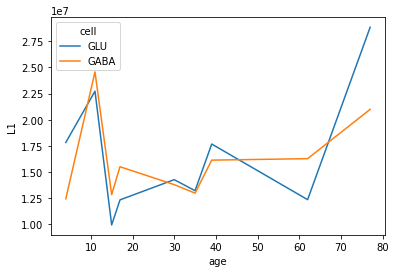

In [23]:
import seaborn as sns
sns.lineplot(data=te_c_df, x="age", y="L1", hue="cell")

<AxesSubplot:xlabel='age', ylabel='SINE'>

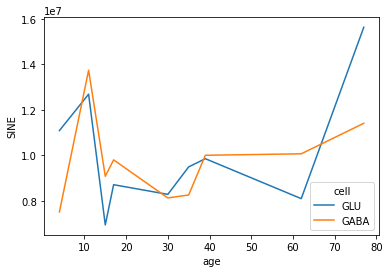

In [26]:
sns.lineplot(data=te_c_df, x="age", y="SINE", hue="cell")

In [ ]:
#LINES ->  


In [50]:
#SINES

prac[prac['gene'].str.contains("sine", case=False)]



,gene,counts
60656,Alu:Alu:SINE,6249
60657,AluJb:Alu:SINE,682339
60658,AluJo:Alu:SINE,395630
60659,AluJr4:Alu:SINE,112932
60660,AluJr:Alu:SINE,453281
60661,AluSc5:Alu:SINE,28666
60662,AluSc8:Alu:SINE,76936
60663,AluSc:Alu:SINE,135043
60664,AluSg4:Alu:SINE,24789
60665,AluSg7:Alu:SINE,29372


In [ ]:
# TE over age -> coarse

In [ ]:
# TE over age -> granular

In [ ]:
# heatmap

# Cell state genes

